#### Generating 'sine' values

In [12]:
import numpy as np
step_size = (20*np.pi/1000)
points = np.arange(1000) #returns evenly space points b/w 0 and 1000
points = step_size*points  #now distance b/w two points is 20*np.pi/1000
dataset = np.sin(points)[:,None] #creates sine values at generated points

#### Plotting the generated sine values

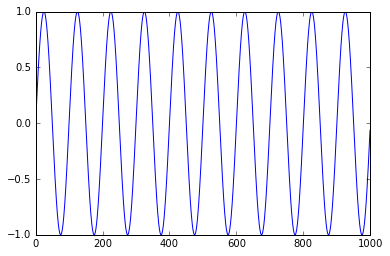

In [13]:
import matplotlib.pyplot as plt
plt.plot(dataset)
plt.show()

#### Function - Generate X and Y for the LSTM

In [14]:
# convert an array of values into a dataset matrix
# look_back looks back previous (look_back - 1) datapoints
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

#### Normalizing the dateset

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset) #normalize dataset into the range (0, 1)

#### Splitting the dataset into train and test datasets

In [16]:
train_size = int(len(dataset)*0.67)
test_size   = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

#### Window of 5 time steps

In [17]:
look_back = 20

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print trainX.shape
print trainY.shape
print testX.shape
print testY.shape

(650, 20)
(650,)
(310, 20)
(310,)


#### Reshaping the trainX and testX into a format that is expected by an LSTM network. i.e. [samples, time steps, features].

In [18]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

print 'trainX shape = ', trainX.shape
print 'testX shape   = ', testX.shape

print trainX[0], '=>' , trainY[0]
print trainX[1], '=>' , trainY[1]

trainX shape =  (650, 20, 1)
testX shape   =  (310, 20, 1)
[[0.5       ]
 [0.53139526]
 [0.56266662]
 [0.59369066]
 [0.62434494]
 [0.6545085 ]
 [0.68406228]
 [0.71288965]
 [0.74087684]
 [0.7679134 ]
 [0.79389263]
 [0.81871199]
 [0.84227355]
 [0.86448431]
 [0.88525662]
 [0.9045085 ]
 [0.92216396]
 [0.93815334]
 [0.95241353]
 [0.96488824]] => 0.9755282581475768
[[0.53139526]
 [0.56266662]
 [0.59369066]
 [0.62434494]
 [0.6545085 ]
 [0.68406228]
 [0.71288965]
 [0.74087684]
 [0.7679134 ]
 [0.79389263]
 [0.81871199]
 [0.84227355]
 [0.86448431]
 [0.88525662]
 [0.9045085 ]
 [0.92216396]
 [0.93815334]
 [0.95241353]
 [0.96488824]
 [0.97552826]] => 0.9842915805643155


#### Building the LSTM model

In [19]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(32, input_dim=1))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1)

/home/tgi/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  """
/home/tgi/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(32, input_shape=(None, 1))`
  """


Epoch 1/100
650/650 [==============================] - 30s 46ms/step - loss: 0.0270 - acc: 0.0200
Epoch 2/100
650/650 [==============================] - 30s 47ms/step - loss: 0.0065 - acc: 0.0200
Epoch 3/100
650/650 [==============================] - 25s 38ms/step - loss: 0.0056 - acc: 0.0200
Epoch 4/100
650/650 [==============================] - 24s 37ms/step - loss: 0.0052 - acc: 0.0200
Epoch 5/100
650/650 [==============================] - 25s 38ms/step - loss: 0.0038 - acc: 0.0200
Epoch 6/100
650/650 [==============================] - 26s 39ms/step - loss: 0.0039 - acc: 0.0200
Epoch 7/100
650/650 [==============================] - 35s 54ms/step - loss: 0.0032 - acc: 0.0200
Epoch 8/100
650/650 [==============================] - 26s 40ms/step - loss: 0.0033 - acc: 0.0200
Epoch 9/100
650/650 [==============================] - 31s 48ms/step - loss: 0.0029 - acc: 0.0200
Epoch 10/100
650/650 [==============================] - 26s 40ms/step - loss: 0.0032 - acc: 0.0200
Epoch 11/100
650/65

650/650 [==============================] - 45s 69ms/step - loss: 0.0022 - acc: 0.0200
Epoch 84/100
650/650 [==============================] - 47s 72ms/step - loss: 0.0018 - acc: 0.0200
Epoch 85/100
650/650 [==============================] - 45s 70ms/step - loss: 0.0018 - acc: 0.0200
Epoch 86/100
650/650 [==============================] - 45s 69ms/step - loss: 0.0020 - acc: 0.0200
Epoch 87/100
650/650 [==============================] - 48s 73ms/step - loss: 0.0019 - acc: 0.0200
Epoch 88/100
650/650 [==============================] - 42s 64ms/step - loss: 0.0019 - acc: 0.0200
Epoch 89/100
650/650 [==============================] - 42s 64ms/step - loss: 0.0020 - acc: 0.0200
Epoch 90/100
650/650 [==============================] - 45s 70ms/step - loss: 0.0022 - acc: 0.0200
Epoch 91/100
650/650 [==============================] - 49s 76ms/step - loss: 0.0022 - acc: 0.0200
Epoch 92/100
650/650 [==============================] - 45s 69ms/step - loss: 0.0016 - acc: 0.0200
Epoch 93/100
650/650 [=

In [20]:
trainScore = model.evaluate(trainX, trainY, batch_size=1, verbose=1)
print('Train Score: ', trainScore)
testScore = model.evaluate(testX, testY, batch_size=1, verbose=1)
print('Test Score: ', testScore)

650/650 [==============================] - 2s 3ms/step
('Train Score: ', [4.2306207760516986e-05, 0.02])
310/310 [==============================] - 1s 2ms/step
('Test Score: ', [4.116879557235892e-05, 0.01935483870967742])


#### Predicting Future Values of Sine Function

In [21]:
look_ahead = 250
trainPredict = [np.vstack([trainX[-1][1:], trainY[-1]])]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([trainPredict[-1]]), batch_size=1)
    predictions[i] = prediction
    trainPredict.append(np.vstack([trainPredict[-1][1:],prediction]))

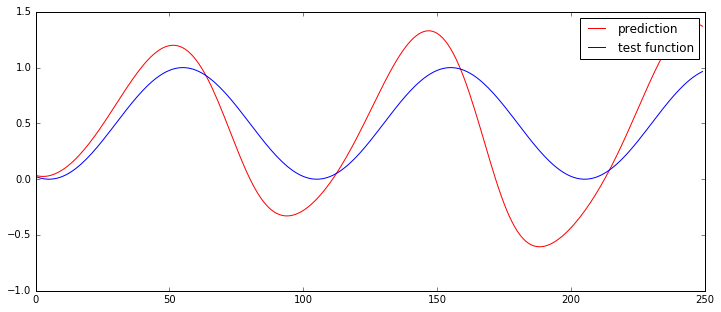

In [22]:
plt.figure(figsize=(12,5))
# plt.plot(np.arange(len(trainX)),np.squeeze(trainX))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(trainPredict)[:,None][1:]))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(testY)[:,None][:200]),'r')
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),dataset[train_size:(train_size+look_ahead)],label="test function")
plt.legend()
plt.show()